# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Restart kernel after this
!pip310 install .

Processing c:\users\gz73vg\documents\projects\udacity reinforcement learning\udacity-rl-navigation-proj
Using legacy 'setup.py install' for unityagents, since package 'wheel' is not installed.
  Attempting uninstall: unityagents
    Found existing installation: unityagents 0.4.0
    Uninstalling unityagents-0.4.0:
      Successfully uninstalled unityagents-0.4.0
    Running setup.py install for unityagents: started
    Running setup.py install for unityagents: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
You should consider upgrading via the 'C:\Users\GZ73VG\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe", no_graphics=True, seed=30)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         0.         1.         0.         0.05489779 1.
 0.         0.         0.         0.2886712  1.         0.
 0.         0.         0.33970422 0.         0.         1.
 0.         0.05648908 0.         1.         0.         0.
 0.54536796 0.         0.         1.         0.         0.24240446
 0.         1.         0.         0.         0.49427128 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
SKIP_RANDOM = True

if not SKIP_RANDOM:

    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
        
    print("Score: {}".format(score))

### 4. Train Agent

In [7]:
from collections import deque
import torch
from learner.dqn_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Global hyperparameters

BUFFER_SIZE = int(1e5)          # replay buffer size
BATCH_SIZE = 64                 # replay minibatch size
GAMMA = 0.99                    # discount factor in TD control
TAU = 1e-3                      # for soft update of target parameters
LR = 5e-4                       # learning rate 
UPDATE_EVERY = 4                # how often to update the network

EPS_START = 1.0                 # Starting exploration factor
EPS_END = 0.01                  # Ending exploration factor
EPS_DECAY = 0.995               # Rate of anealing of exploration factor

USE_DOUBLE_Q = True             # Whether to use Double DQN
USE_PRIORITIZED_REPLAY = False  # Whether to use prioritized replay (enabling it can be slow for large BUFFER_SIZE)
PRIORITIZED_REPLAY_ALPHA = 0.5  # Power to the prioritized replay probability

N_EPISODES = 2000               # Max number of training episodes
MAX_T = 1000                    # Max number of actions per episode
VICTORY_SCORE = 20              # Threshold of score's running average for ending training

Episode 0	Average Score: -1.00
Episode 100	Average Score: 0.74
Episode 200	Average Score: 4.21
Episode 300	Average Score: 7.13
Episode 400	Average Score: 10.19
Episode 500	Average Score: 12.68
Episode 600	Average Score: 14.68
Episode 700	Average Score: 15.42
Episode 800	Average Score: 15.28
Episode 900	Average Score: 15.82
Episode 1000	Average Score: 16.03
Episode 1100	Average Score: 16.18
Episode 1200	Average Score: 15.96
Episode 1300	Average Score: 16.76
Episode 1400	Average Score: 16.03
Episode 1500	Average Score: 16.85
Episode 1600	Average Score: 16.09
Episode 1700	Average Score: 16.37
Episode 1800	Average Score: 15.78
Episode 1900	Average Score: 15.37


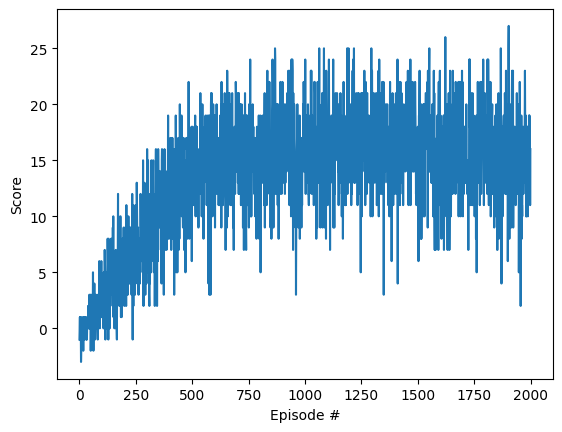

In [9]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, 
              replay_buffer_size=BUFFER_SIZE, replay_batch_size=BATCH_SIZE, update_every=UPDATE_EVERY, target_gamma=GAMMA, update_tau=TAU, lr=LR,
              use_double_q = USE_DOUBLE_Q, use_priorized_replay = USE_PRIORITIZED_REPLAY, prioritized_replay_alpha=PRIORITIZED_REPLAY_ALPHA)

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
eps = EPS_START                    # initialize epsilon

for i_episode in range(N_EPISODES):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations[0]
    score = 0

    for t in range(MAX_T):
        # Get agent's action per policy
        action = agent.act(state, eps)

        # Apply agent's action to env
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished

        # Agent remembers and learns
        agent.step(state, action, reward, next_state, done)

        state = next_state
        score += reward
        if done:
            break

    scores_window.append(score)       # save most recent score
    scores.append(score)              # save most recent score
    eps = max(EPS_END, EPS_DECAY*eps) # decrease epsilon

    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

    if np.mean(scores_window) >= VICTORY_SCORE:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'trained_weights/model.pt')
        break


# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('plots/DoubleDQNScores.png')

env.close()

### 4. Watch the Smart Agent

Restart kernel if running this right after training to reload Unity.

In [1]:
from unityagents import UnityEnvironment
from learner.dqn_agent import Agent
import torch

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe", no_graphics=False, worker_id = 1, seed = 42)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]

action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])
agent = Agent(state_size=state_size, action_size=action_size, use_double_q=True)
agent.qnetwork_local.load_state_dict(torch.load('trained_weights/model.pt'))

score = 0
for j in range(1000):
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    state = env_info.vector_observations[0]
    done = env_info.local_done[0]
    score += env_info.rewards[0]
    if done:
        break 
            
print('\rTotal Score: {:.2f}'.format(score))
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
W:\Temp\ipykernel_7976\626284948.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `w

Total Score: 12.00
